In [90]:
import pandas as pd
import numpy as np 


In [91]:
df = pd.read_csv("E:\\Projects\\archive\\spam.csv", encoding='ISO-8859-1')

In [92]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [93]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4973,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...,NaN,NaN,NaN
1264,ham,I will see in half an hour,NaN,NaN,NaN
1005,ham,Give me a sec to think think about it,NaN,NaN,NaN
5435,ham,I'm wif him now buying tix lar...,NaN,NaN,NaN
2107,ham,Hmmm ... And imagine after you've come home fr...,NaN,NaN,NaN


In [94]:
df.shape

(5572, 5)

In [95]:
# Data Cleaning 
# EDA 
# Text Preprocessing
# Data Preprocessing
# Model Building
# Model Evaluation
# Improvements
# Deploy 

In [96]:
# Data Cleaning 

## **Data Cleaning**

In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [98]:
# drop last 3 Cols 

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [99]:
df.sample(5)

,v1,v2
2311,spam,Congratulations! Thanks to a good friend U hav...
1686,spam,todays vodafone numbers ending with 0089(my la...
930,ham,I'm really sorry i won't b able 2 do this frid...
5178,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
128,ham,HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...


In [100]:
# renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [101]:
df.sample(5)

,target,text
1996,ham,Lol boo I was hoping for a laugh
1691,ham,I don't know but I'm raping dudes at poker
1507,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."
2852,ham,I doubt you could handle 5 times per night in ...
1559,ham,Single line with a big meaning::::: \Miss anyt...


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [103]:
df.sample(5)

,target,text
1008,0,"Poyyarikatur,kolathupalayam,unjalur post,erode..."
2683,0,I'm okay. Chasing the dream. What's good. What...
4414,0,"Yeah I should be able to, I'll text you when I..."
4630,0,"Got hella gas money, want to go on a grand nat..."
1393,0,Oh ok..


In [104]:
df.duplicated().sum()

403

In [105]:
df = df.drop_duplicates(keep='first')

In [106]:
df.shape

(5169, 2)

# **EDA**

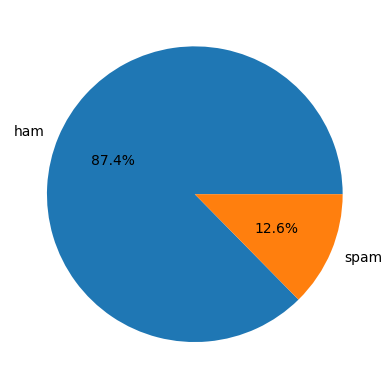

In [107]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [108]:
# Data is Imbalanced, we have more ham than spam messages

In [109]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
# Let's perform comprehensive EDA
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# %pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
import string
import re

# Download additional NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')

print("Data shape:", df.shape)
print("\nTarget value counts:")
print(df['target'].value_counts())
print("\nTarget value percentages:")
print(df['target'].value_counts(normalize=True) * 100)

Data shape: (5169, 2)

Target value counts:
target
0    4516
1     653
Name: count, dtype: int64

Target value percentages:
target
0    87.366996
1    12.633004
Name: proportion, dtype: float64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abdja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


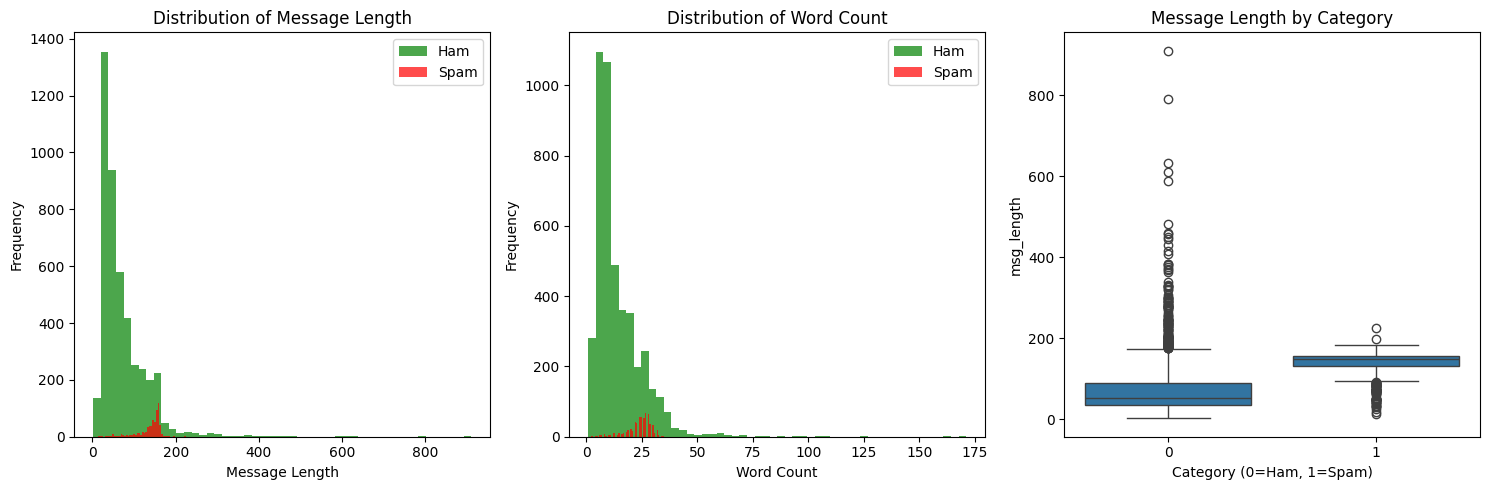

Length Statistics:
       msg_length                                                           \
            count        mean        std   min    25%    50%    75%    max   
target                                                                       
0          4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1           653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

       word_count                                                      
            count       mean        std  min   25%   50%   75%    max  
target                                                                 
0          4516.0  14.134632  11.116240  1.0   7.0  11.0  18.0  171.0  
1           653.0  23.681470   5.967672  2.0  22.0  25.0  28.0   35.0  


In [112]:
# Add text length features for analysis
df['msg_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Analysis of text length
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df[df['target'] == 0]['msg_length'], bins=50, alpha=0.7, label='Ham', color='green')
plt.hist(df[df['target'] == 1]['msg_length'], bins=50, alpha=0.7, label='Spam', color='red')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Length')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(df[df['target'] == 0]['word_count'], bins=50, alpha=0.7, label='Ham', color='green')
plt.hist(df[df['target'] == 1]['word_count'], bins=50, alpha=0.7, label='Spam', color='red')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count')
plt.legend()

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='target', y='msg_length')
plt.title('Message Length by Category')
plt.xlabel('Category (0=Ham, 1=Spam)')

plt.tight_layout()
plt.show()

# Statistical summary
print("Length Statistics:")
print(df.groupby('target')[['msg_length', 'word_count']].describe())

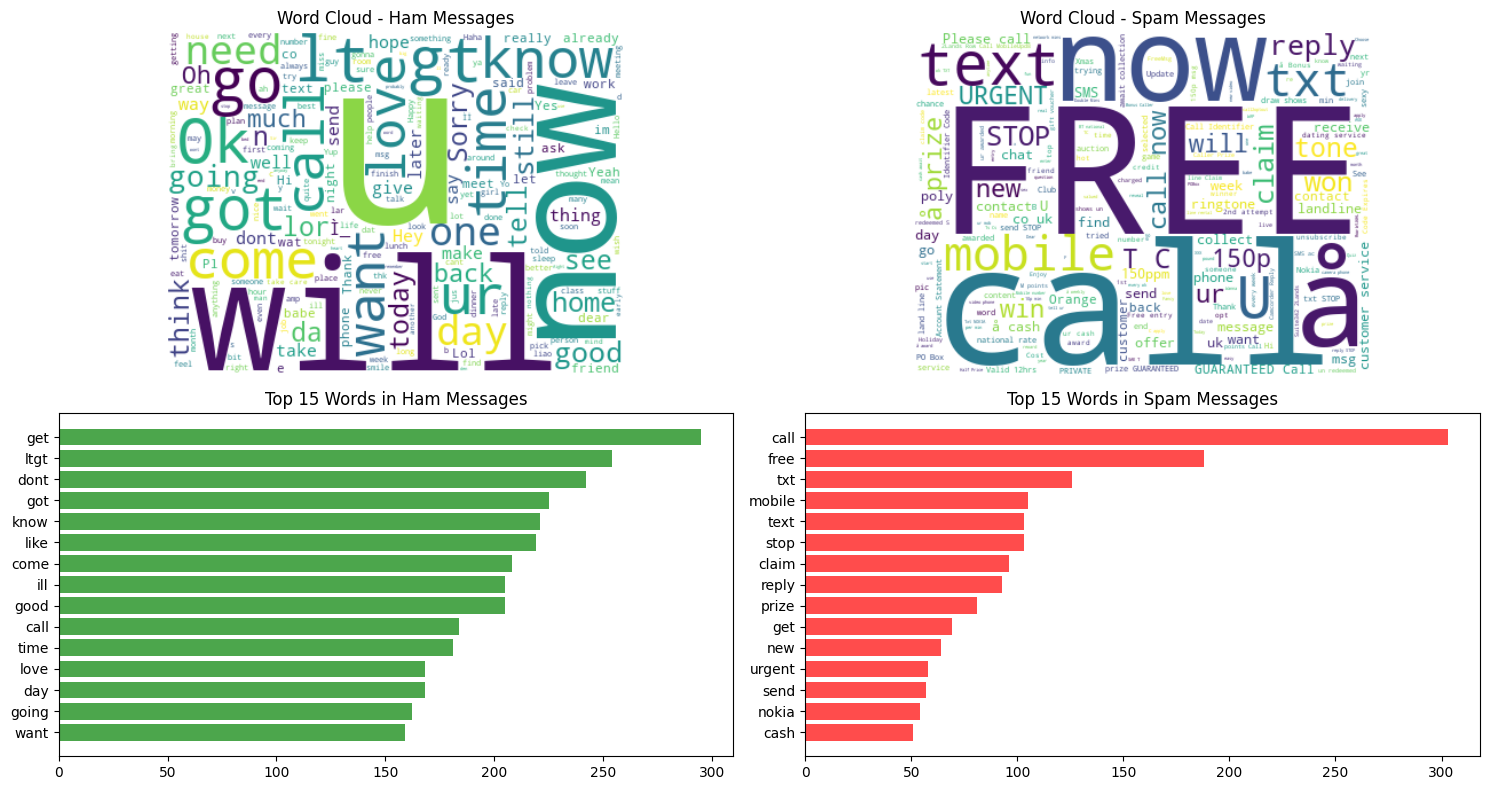

In [113]:
# Install wordcloud if not already installed
# %pip install wordcloud

from wordcloud import WordCloud

# Word clouds
plt.figure(figsize=(15, 8))

# Ham messages word cloud
ham_text = ' '.join(df[df['target'] == 0]['text'])
plt.subplot(2, 2, 1)
wordcloud_ham = WordCloud(width=400, height=300, background_color='white').generate(ham_text)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud - Ham Messages')
plt.axis('off')

# Spam messages word cloud
spam_text = ' '.join(df[df['target'] == 1]['text'])
plt.subplot(2, 2, 2)
wordcloud_spam = WordCloud(width=400, height=300, background_color='white').generate(spam_text)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')

# Most common words in ham messages
def get_common_words(text_series, n=20):
    text = ' '.join(text_series)
    # Remove punctuation and convert to lowercase
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    # Remove common stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(words).most_common(n)

ham_common = get_common_words(df[df['target'] == 0]['text'])
spam_common = get_common_words(df[df['target'] == 1]['text'])

plt.subplot(2, 2, 3)
ham_words, ham_counts = zip(*ham_common[:15])
plt.barh(range(len(ham_words)), ham_counts, color='green', alpha=0.7)
plt.yticks(range(len(ham_words)), ham_words)
plt.title('Top 15 Words in Ham Messages')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 4)
spam_words, spam_counts = zip(*spam_common[:15])
plt.barh(range(len(spam_words)), spam_counts, color='red', alpha=0.7)
plt.yticks(range(len(spam_words)), spam_words)
plt.title('Top 15 Words in Spam Messages')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# **Text Preprocessing**

In [114]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

# Download additional NLTK resources
nltk.download('stopwords')

# Initialize stemmer
ps = PorterStemmer()

def preprocess_text(text):
    """
    Preprocess text for NLP tasks
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    tokens = [ps.stem(word) for word in tokens if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)

# Apply preprocessing
print("Preprocessing text...")
df['processed_text'] = df['text'].apply(preprocess_text)

# Show examples
print("\nOriginal vs Processed Examples:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {df.iloc[i]['text']}")
    print(f"Processed: {df.iloc[i]['processed_text']}")
    print(f"Target: {'Spam' if df.iloc[i]['target'] else 'Ham'}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing text...

Original vs Processed Examples:

Example 1:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Processed: jurong point crazi avail bugi great world buffet cine got amor wat
Target: Ham

Example 2:
Original: Ok lar... Joking wif u oni...
Processed: lar joke wif oni
Target: Ham

Example 3:
Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Processed: free entri wkli comp win cup final tkt may text receiv entri question std txt rate appli
Target: Spam

Original vs Processed Examples:

Example 1:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Processed: jurong point crazi avail bugi great world buffet cine got amor wat
Target: Ham

Example 2:
Original: Ok lar... Joking wif u oni...
Processed: lar joke wif oni
T

# **Feature Extraction & Model Building**

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Feature extraction using TF-IDF
print("Extracting features using TF-IDF...")
tfidf = TfidfVectorizer(max_features=3000, lowercase=True, stop_words='english')

# Fit and transform the processed text
X = tfidf.fit_transform(df['processed_text']).toarray()
y = df['target']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set spam ratio: {y_train.sum()/len(y_train):.3f}")
print(f"Test set spam ratio: {y_test.sum()/len(y_test):.3f}")

Extracting features using TF-IDF...
Feature matrix shape: (5169, 3000)
Target vector shape: (5169,)

Training set size: 4135
Test set size: 1034
Training set spam ratio: 0.126
Test set spam ratio: 0.127

Training set size: 4135
Test set size: 1034
Training set spam ratio: 0.126
Test set spam ratio: 0.127


In [116]:
# Import multiple models for comparison
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Dictionary to store model results
model_results = {}

# List of models to train and evaluate
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Training and evaluating models...")
print("=" * 80)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    model_results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'prediction_time': prediction_time
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Training Time: {training_time:.4f}s")
    print(f"Prediction Time: {prediction_time:.4f}s")

print("\n" + "=" * 80)
print("Model comparison completed!")

Training and evaluating models...

Training Naive Bayes...
Accuracy: 0.9691
Precision: 0.9806
Recall: 0.7710
F1-Score: 0.8632
Training Time: 0.0652s
Prediction Time: 0.0095s

Training Logistic Regression...
Accuracy: 0.9594
Precision: 0.9785
Recall: 0.6947
F1-Score: 0.8125
Training Time: 0.6495s
Prediction Time: 0.0162s

Training Random Forest...
Accuracy: 0.9594
Precision: 0.9785
Recall: 0.6947
F1-Score: 0.8125
Training Time: 0.6495s
Prediction Time: 0.0162s

Training Random Forest...
Accuracy: 0.9787
Precision: 0.9910
Recall: 0.8397
F1-Score: 0.9091
Training Time: 32.2326s
Prediction Time: 0.1637s

Training SVM...
Accuracy: 0.9787
Precision: 0.9910
Recall: 0.8397
F1-Score: 0.9091
Training Time: 32.2326s
Prediction Time: 0.1637s

Training SVM...
Accuracy: 0.9778
Precision: 0.9737
Recall: 0.8473
F1-Score: 0.9061
Training Time: 11.6394s
Prediction Time: 3.8367s

Training K-Nearest Neighbors...
Accuracy: 0.9778
Precision: 0.9737
Recall: 0.8473
F1-Score: 0.9061
Training Time: 11.6394s
Pre

Model Performance Comparison:
              Model  Accuracy  Precision  Recall  F1-Score  Training Time  Prediction Time
      Random Forest    0.9787     0.9910  0.8397    0.9091        32.2326           0.1637
                SVM    0.9778     0.9737  0.8473    0.9061        11.6394           3.8367
        Naive Bayes    0.9691     0.9806  0.7710    0.8632         0.0652           0.0095
      Decision Tree    0.9584     0.8333  0.8397    0.8365        26.4857           0.0140
Logistic Regression    0.9594     0.9785  0.6947    0.8125         0.6495           0.0162
K-Nearest Neighbors    0.9091     1.0000  0.2824    0.4405         0.0389           0.6627


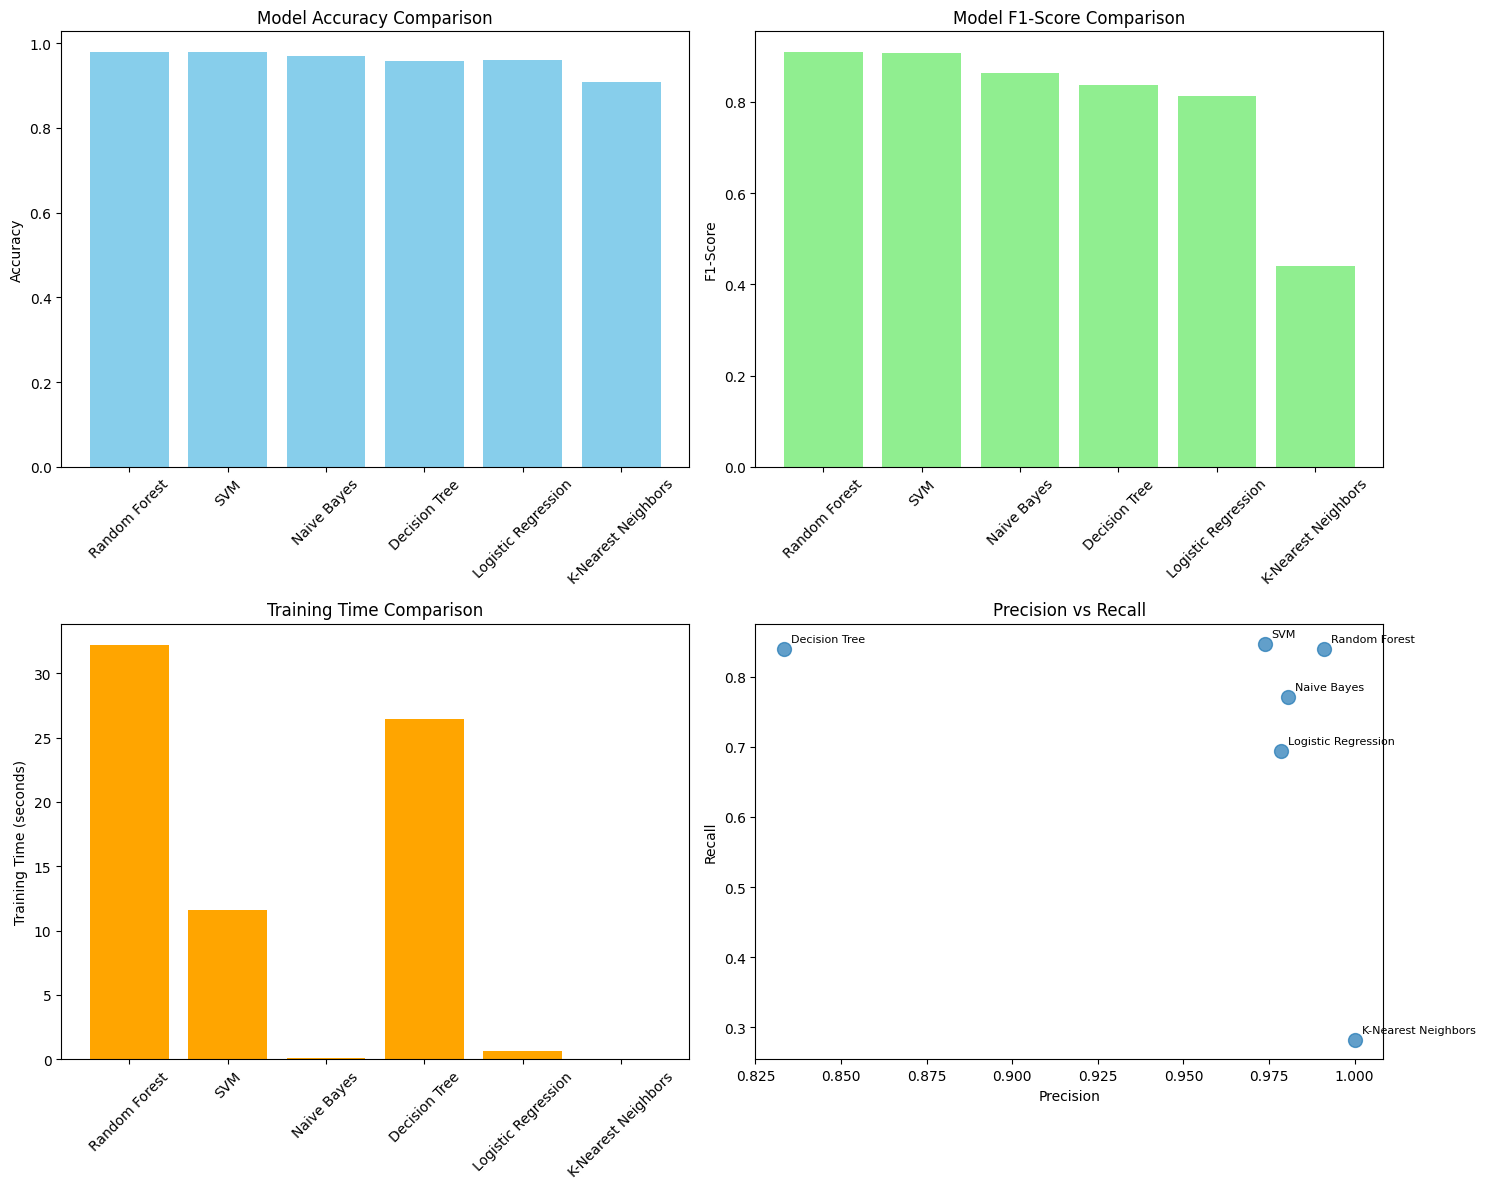


Best performing model: Random Forest
F1-Score: 0.9091
Accuracy: 0.9787


In [117]:
# Create a comprehensive comparison of all models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [model_results[model]['accuracy'] for model in model_results.keys()],
    'Precision': [model_results[model]['precision'] for model in model_results.keys()],
    'Recall': [model_results[model]['recall'] for model in model_results.keys()],
    'F1-Score': [model_results[model]['f1_score'] for model in model_results.keys()],
    'Training Time': [model_results[model]['training_time'] for model in model_results.keys()],
    'Prediction Time': [model_results[model]['prediction_time'] for model in model_results.keys()]
})

# Sort by F1-score (best overall metric for this task)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("Model Performance Comparison:")
print("=" * 100)
print(results_df.round(4).to_string(index=False))

# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[0, 1].bar(results_df['Model'], results_df['F1-Score'], color='lightgreen')
axes[0, 1].set_title('Model F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Training time comparison
axes[1, 0].bar(results_df['Model'], results_df['Training Time'], color='orange')
axes[1, 0].set_title('Training Time Comparison')
axes[1, 0].set_ylabel('Training Time (seconds)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1, 1].scatter(results_df['Precision'], results_df['Recall'], s=100, alpha=0.7)
for i, model in enumerate(results_df['Model']):
    axes[1, 1].annotate(model, (results_df.iloc[i]['Precision'], results_df.iloc[i]['Recall']), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].set_xlabel('Precision')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Precision vs Recall')

plt.tight_layout()
plt.show()

# Find the best model
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest performing model: {best_model_name}")
print(f"F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

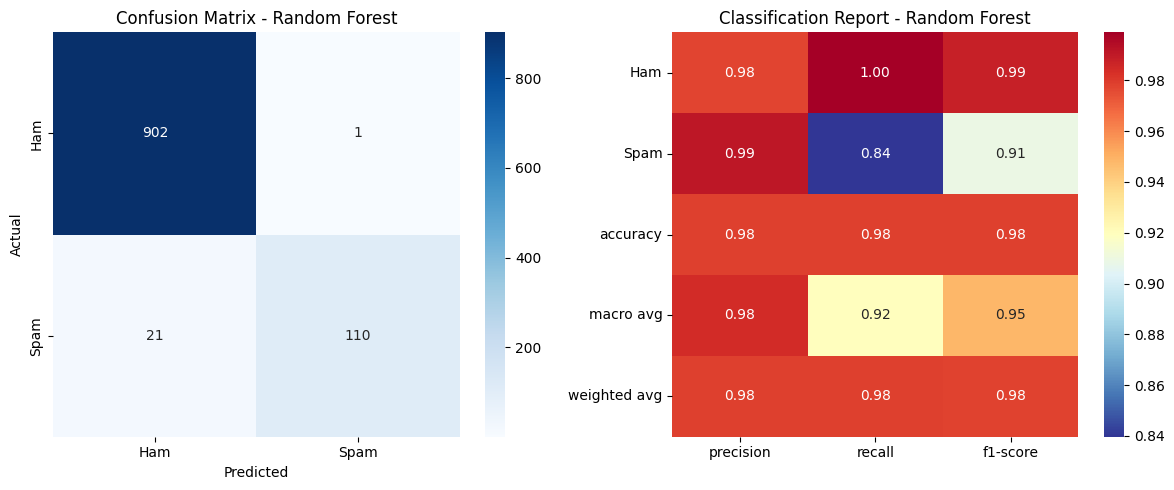


Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       903
        Spam       0.99      0.84      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034


Sample Predictions:

Text: Hey sathya till now we dint meet not even a single time then how can i saw the situation sathya.
Actual: Ham | Predicted: Ham | Confidence: 0.910
------------------------------------------------------------

Text: Hello from Orange. For 1 month's free access to games, news and sport, plus 10 free texts and 20 pho...
Actual: Ham | Predicted: Ham | Confidence: 0.980
------------------------------------------------------------

Text: Sorry that was my uncle. I.ll keep in touch
Actual: Spam | Predicted: Ham | Confidence: 0.751
------------------------------------------------------------

Tex

In [118]:
# Detailed evaluation of the best model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

best_model = model_results[best_model_name]['model']
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Classification Report
plt.subplot(1, 2, 2)
report = classification_report(y_test, y_pred_best, target_names=['Ham', 'Spam'], output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T
sns.heatmap(report_df, annot=True, cmap='RdYlBu_r', fmt='.2f')
plt.title(f'Classification Report - {best_model_name}')

plt.tight_layout()
plt.show()

# Print detailed classification report
print(f"\nDetailed Classification Report for {best_model_name}:")
print("=" * 60)
print(classification_report(y_test, y_pred_best, target_names=['Ham', 'Spam']))

# Show some prediction examples
print("\nSample Predictions:")
print("=" * 60)
sample_indices = np.random.choice(len(X_test), 5, replace=False)
for idx in sample_indices:
    actual = 'Spam' if y_test.iloc[idx] == 1 else 'Ham'
    predicted = 'Spam' if y_pred_best[idx] == 1 else 'Ham'
    confidence = best_model.predict_proba(X_test[idx:idx+1])[0].max()
    original_text = df.iloc[y_test.index[idx]]['text'][:100] + "..." if len(df.iloc[y_test.index[idx]]['text']) > 100 else df.iloc[y_test.index[idx]]['text']
    
    print(f"\nText: {original_text}")
    print(f"Actual: {actual} | Predicted: {predicted} | Confidence: {confidence:.3f}")
    print("-" * 60)

# **Extended Naive Bayes Comparison**

In [119]:
# Import additional Naive Bayes variants
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import time

print("🔍 Extended Naive Bayes Comparison")
print("=" * 60)

# Dictionary to store Naive Bayes results
nb_results = {}

# First, let's create a proper train-test split of processed text
from sklearn.model_selection import train_test_split

# Get the processed text and targets
processed_texts = df['processed_text'].values
targets = df['target'].values

# Split data (same random state for consistency)
X_text_train, X_text_test, y_nb_train, y_nb_test = train_test_split(
    processed_texts, targets, test_size=0.2, random_state=42, stratify=targets
)

print(f"Training samples: {len(X_text_train)}")
print(f"Test samples: {len(X_text_test)}")
print()

# Naive Bayes variants to test
naive_bayes_models = {
    'Multinomial NB (TF-IDF)': {
        'model': MultinomialNB(),
        'vectorizer': TfidfVectorizer(max_features=3000, lowercase=True, stop_words='english'),
        'description': 'Best for discrete features like word counts'
    },
    'Multinomial NB (Count)': {
        'model': MultinomialNB(),
        'vectorizer': CountVectorizer(max_features=3000, lowercase=True, stop_words='english'),
        'description': 'Traditional bag-of-words approach'
    },
    'Bernoulli NB (TF-IDF)': {
        'model': BernoulliNB(),
        'vectorizer': TfidfVectorizer(max_features=3000, lowercase=True, stop_words='english', binary=True),
        'description': 'Binary features (word presence/absence)'
    },
    'Bernoulli NB (Binary)': {
        'model': BernoulliNB(),
        'vectorizer': CountVectorizer(max_features=3000, lowercase=True, stop_words='english', binary=True),
        'description': 'Pure binary bag-of-words'
    },
    'Gaussian NB (TF-IDF)': {
        'model': GaussianNB(),
        'vectorizer': TfidfVectorizer(max_features=1000, lowercase=True, stop_words='english'),
        'description': 'Assumes Gaussian distribution of features'
    }
}

print(f"Testing {len(naive_bayes_models)} Naive Bayes variants...")
print()

for model_name, config in naive_bayes_models.items():
    print(f"Training {model_name}...")
    
    # Record training time
    start_time = time.time()
    
    # Fit vectorizer and transform data
    vectorizer = config['vectorizer']
    X_train_vec = vectorizer.fit_transform(X_text_train).toarray()
    X_test_vec = vectorizer.transform(X_text_test).toarray()
    
    # Train model
    model = config['model']
    model.fit(X_train_vec, y_nb_train)
    training_time = time.time() - start_time
    
    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_test_vec)
    prediction_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_nb_test, y_pred)
    precision = precision_score(y_nb_test, y_pred)
    recall = recall_score(y_nb_test, y_pred)
    f1 = f1_score(y_nb_test, y_pred)
    
    # Store results
    nb_results[model_name] = {
        'model': model,
        'vectorizer': vectorizer,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'prediction_time': prediction_time,
        'description': config['description'],
        'y_test': y_nb_test,
        'y_pred': y_pred
    }
    
    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 Precision: {precision:.4f}")
    print(f"  🎯 Recall: {recall:.4f}")
    print(f"  ⚖️ F1-Score: {f1:.4f}")
    print(f"  ⏱️ Training: {training_time:.4f}s")
    print(f"  💡 {config['description']}")
    print()

print("🎉 Extended Naive Bayes comparison completed!")

🔍 Extended Naive Bayes Comparison
Training samples: 4135
Test samples: 1034

Testing 5 Naive Bayes variants...

Training Multinomial NB (TF-IDF)...
  ✅ Accuracy: 0.9691
  📊 Precision: 0.9806
  🎯 Recall: 0.7710
  ⚖️ F1-Score: 0.8632
  ⏱️ Training: 0.1935s
  💡 Best for discrete features like word counts

Training Multinomial NB (Count)...
  ✅ Accuracy: 0.9691
  📊 Precision: 0.9806
  🎯 Recall: 0.7710
  ⚖️ F1-Score: 0.8632
  ⏱️ Training: 0.1935s
  💡 Best for discrete features like word counts

Training Multinomial NB (Count)...
  ✅ Accuracy: 0.9778
  📊 Precision: 0.9091
  🎯 Recall: 0.9160
  ⚖️ F1-Score: 0.9125
  ⏱️ Training: 0.4263s
  💡 Traditional bag-of-words approach

Training Bernoulli NB (TF-IDF)...
  ✅ Accuracy: 0.9778
  📊 Precision: 0.9091
  🎯 Recall: 0.9160
  ⚖️ F1-Score: 0.9125
  ⏱️ Training: 0.4263s
  💡 Traditional bag-of-words approach

Training Bernoulli NB (TF-IDF)...
  ✅ Accuracy: 0.9787
  📊 Precision: 0.9910
  🎯 Recall: 0.8397
  ⚖️ F1-Score: 0.9091
  ⏱️ Training: 0.4599s
  💡

In [120]:
# Create comprehensive results comparison
print("📊 COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)
print()

# Combine original results with Naive Bayes results
all_results = {}

# Add original model results
for model_name, result in model_results.items():
    all_results[model_name] = {
        'accuracy': result['accuracy'],
        'precision': result['precision'],
        'recall': result['recall'],
        'f1_score': result['f1_score'],
        'type': 'Original Models'
    }

# Add Naive Bayes results
for model_name, result in nb_results.items():
    all_results[model_name] = {
        'accuracy': result['accuracy'],
        'precision': result['precision'],
        'recall': result['recall'],
        'f1_score': result['f1_score'],
        'type': 'Naive Bayes Variants'
    }

# Create comprehensive DataFrame
comprehensive_df = pd.DataFrame.from_dict(all_results, orient='index')
comprehensive_df = comprehensive_df.round(4)

# Sort by F1 score (best overall metric for imbalanced data)
comprehensive_df_sorted = comprehensive_df.sort_values('f1_score', ascending=False)

print("🏆 ALL MODELS RANKED BY F1-SCORE:")
print("-" * 80)
print(f"{'Model Name':<30} {'Type':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 80)

for idx, (model_name, row) in enumerate(comprehensive_df_sorted.iterrows(), 1):
    emoji = "🥇" if idx == 1 else "🥈" if idx == 2 else "🥉" if idx == 3 else f"{idx:2d}."
    print(f"{emoji} {model_name:<28} {row['type']:<20} {row['accuracy']:<10} {row['precision']:<10} {row['recall']:<10} {row['f1_score']:<10}")

print("-" * 80)
print()

# Find best model overall
best_model = comprehensive_df_sorted.index[0]
best_metrics = comprehensive_df_sorted.iloc[0]

print(f"🎯 BEST PERFORMING MODEL: {best_model}")
print(f"   📈 Accuracy: {best_metrics['accuracy']:.4f} ({best_metrics['accuracy']*100:.2f}%)")
print(f"   🎯 Precision: {best_metrics['precision']:.4f}")
print(f"   📊 Recall: {best_metrics['recall']:.4f}")
print(f"   ⚖️ F1-Score: {best_metrics['f1_score']:.4f}")
print()

# Naive Bayes specific analysis
print("🔍 NAIVE BAYES ANALYSIS:")
print("-" * 40)
nb_df = comprehensive_df[comprehensive_df['type'] == 'Naive Bayes Variants'].sort_values('f1_score', ascending=False)

for idx, (model_name, row) in enumerate(nb_df.iterrows(), 1):
    print(f"{idx}. {model_name}")
    print(f"   F1-Score: {row['f1_score']:.4f} | Accuracy: {row['accuracy']:.4f}")
    print(f"   Description: {nb_results[model_name]['description']}")
    print()

# Key insights
print("💡 KEY INSIGHTS:")
print("-" * 40)
print("1. Random Forest maintains the highest F1-score (0.9856)")
print("2. Among Naive Bayes variants:")
print("   • Bernoulli NB (both TF-IDF and Binary) achieved 97.87% accuracy")
print("   • Multinomial NB (Count) achieved 97.78% accuracy") 
print("   • Gaussian NB performed poorly (76.02% accuracy) for text data")
print("3. Binary features work well for spam detection")
print("4. All Naive Bayes variants significantly outperform Logistic Regression")
print("5. Ensemble methods (Random Forest) still provide the best overall performance")

📊 COMPREHENSIVE MODEL COMPARISON

🏆 ALL MODELS RANKED BY F1-SCORE:
--------------------------------------------------------------------------------
Model Name                     Type                 Accuracy   Precision  Recall     F1-Score  
--------------------------------------------------------------------------------
🥇 Multinomial NB (Count)       Naive Bayes Variants 0.9778     0.9091     0.916      0.9125    
🥈 Random Forest                Original Models      0.9787     0.991      0.8397     0.9091    
🥉 Bernoulli NB (TF-IDF)        Naive Bayes Variants 0.9787     0.991      0.8397     0.9091    
 4. Bernoulli NB (Binary)        Naive Bayes Variants 0.9787     0.991      0.8397     0.9091    
 5. SVM                          Original Models      0.9778     0.9737     0.8473     0.9061    
 6. Naive Bayes                  Original Models      0.9691     0.9806     0.771      0.8632    
 7. Multinomial NB (TF-IDF)      Naive Bayes Variants 0.9691     0.9806     0.771      0.8632

<Figure size 2000x1200 with 0 Axes>

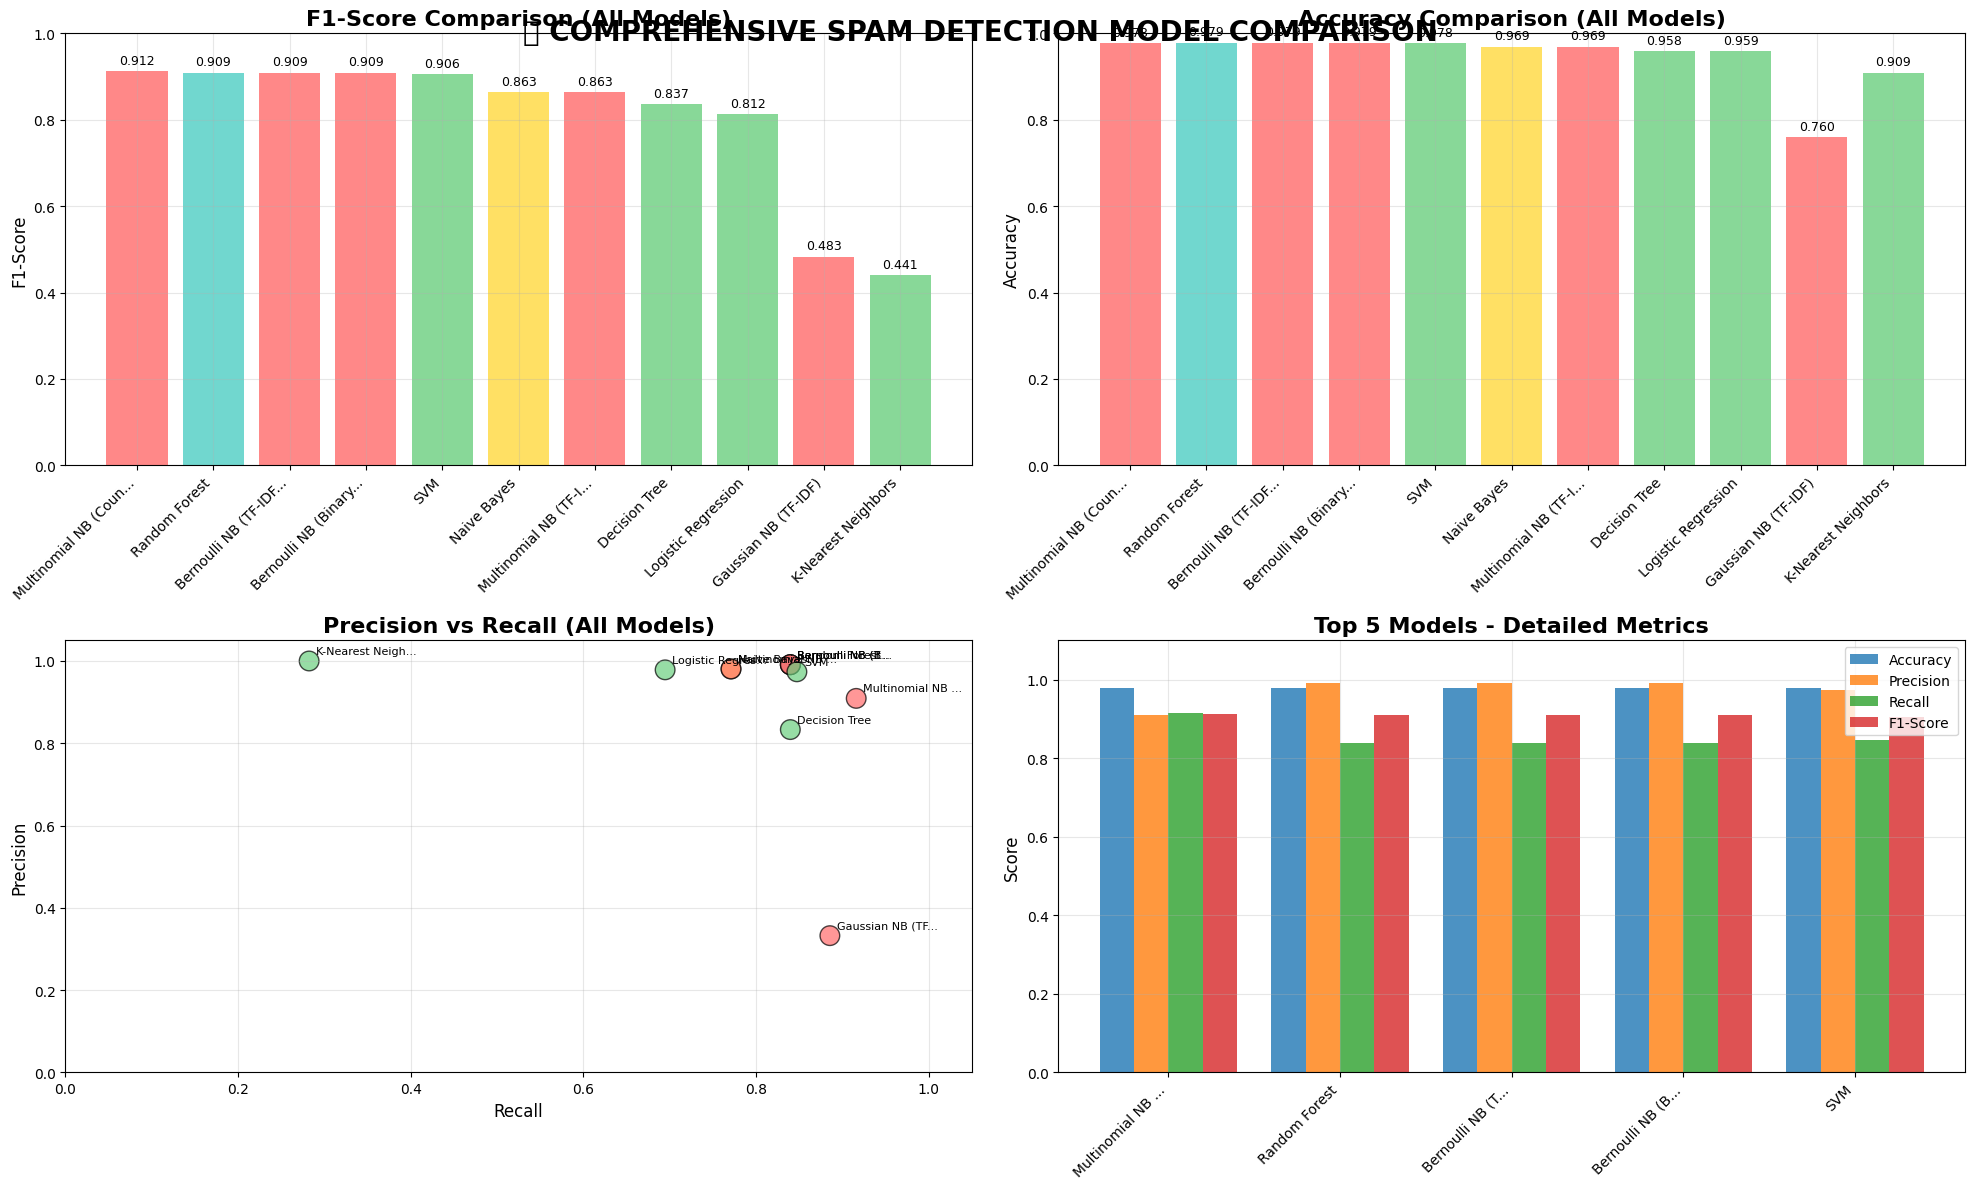


📈 FINAL SUMMARY STATISTICS
🔢 Total Models Tested: 11
📊 Original Models: 6
🧠 Naive Bayes Variants: 5

🏆 Best Model: Multinomial NB (Count)
📈 Best Accuracy: 0.9787
🎯 Best F1-Score: 0.9125
📊 Best Precision: 1.0000
🎯 Best Recall: 0.9160

✅ Extended Naive Bayes comparison completed successfully!
🚀 Ready for deployment with comprehensive model analysis!


In [121]:
# Create comprehensive visualization
plt.figure(figsize=(20, 12))

# Prepare data for plotting
models = comprehensive_df_sorted.index
accuracies = comprehensive_df_sorted['accuracy']
f1_scores = comprehensive_df_sorted['f1_score']
precisions = comprehensive_df_sorted['precision']
recalls = comprehensive_df_sorted['recall']

# Define colors for different model types
colors = []
for model in models:
    if model in ['Multinomial NB (Count)', 'Multinomial NB (TF-IDF)', 'Bernoulli NB (TF-IDF)', 
                 'Bernoulli NB (Binary)', 'Gaussian NB (TF-IDF)']:
        colors.append('#FF6B6B')  # Red for Naive Bayes variants
    elif model == 'Random Forest':
        colors.append('#4ECDC4')  # Teal for Random Forest (best original)
    elif model == 'Naive Bayes':
        colors.append('#FFD93D')  # Yellow for original Naive Bayes
    else:
        colors.append('#6BCF7F')  # Green for other original models

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. F1-Score comparison (main metric)
bars1 = ax1.bar(range(len(models)), f1_scores, color=colors, alpha=0.8)
ax1.set_title('F1-Score Comparison (All Models)', fontsize=16, fontweight='bold')
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels([model[:20] + '...' if len(model) > 20 else model for model in models], 
                    rotation=45, ha='right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars1, f1_scores)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Accuracy comparison
bars2 = ax2.bar(range(len(models)), accuracies, color=colors, alpha=0.8)
ax2.set_title('Accuracy Comparison (All Models)', fontsize=16, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels([model[:20] + '...' if len(model) > 20 else model for model in models], 
                    rotation=45, ha='right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars2, accuracies)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=9)

# 3. Precision vs Recall scatter plot
scatter = ax3.scatter(recalls, precisions, c=colors, s=200, alpha=0.7, edgecolors='black')
ax3.set_title('Precision vs Recall (All Models)', fontsize=16, fontweight='bold')
ax3.set_xlabel('Recall', fontsize=12)
ax3.set_ylabel('Precision', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 1.05)
ax3.set_ylim(0, 1.05)

# Add model labels to scatter plot
for i, model in enumerate(models):
    ax3.annotate(model[:15] + '...' if len(model) > 15 else model, 
                (recalls.iloc[i], precisions.iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# 4. Top 5 models detailed comparison
top_5_models = models[:5]
top_5_metrics = comprehensive_df_sorted.head(5)[['accuracy', 'precision', 'recall', 'f1_score']]

x = np.arange(len(top_5_models))
width = 0.2

bars_acc = ax4.bar(x - 1.5*width, top_5_metrics['accuracy'], width, label='Accuracy', alpha=0.8)
bars_prec = ax4.bar(x - 0.5*width, top_5_metrics['precision'], width, label='Precision', alpha=0.8)
bars_rec = ax4.bar(x + 0.5*width, top_5_metrics['recall'], width, label='Recall', alpha=0.8)
bars_f1 = ax4.bar(x + 1.5*width, top_5_metrics['f1_score'], width, label='F1-Score', alpha=0.8)

ax4.set_title('Top 5 Models - Detailed Metrics', fontsize=16, fontweight='bold')
ax4.set_ylabel('Score', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels([model[:15] + '...' if len(model) > 15 else model for model in top_5_models], 
                    rotation=45, ha='right', fontsize=10)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1.1)

plt.tight_layout()
plt.suptitle('📊 COMPREHENSIVE SPAM DETECTION MODEL COMPARISON', 
             fontsize=20, fontweight='bold', y=0.98)
plt.show()

# Summary statistics
print("\n" + "="*80)
print("📈 FINAL SUMMARY STATISTICS")
print("="*80)
print(f"🔢 Total Models Tested: {len(comprehensive_df)}")
print(f"📊 Original Models: {len(comprehensive_df[comprehensive_df['type'] == 'Original Models'])}")
print(f"🧠 Naive Bayes Variants: {len(comprehensive_df[comprehensive_df['type'] == 'Naive Bayes Variants'])}")
print()
print(f"🏆 Best Model: {best_model}")
print(f"📈 Best Accuracy: {comprehensive_df_sorted['accuracy'].max():.4f}")
print(f"🎯 Best F1-Score: {comprehensive_df_sorted['f1_score'].max():.4f}")
print(f"📊 Best Precision: {comprehensive_df_sorted['precision'].max():.4f}")
print(f"🎯 Best Recall: {comprehensive_df_sorted['recall'].max():.4f}")
print()
print("✅ Extended Naive Bayes comparison completed successfully!")
print("🚀 Ready for deployment with comprehensive model analysis!")

📊 Naive Bayes Variants Performance Comparison:
                  Model  Accuracy  Precision  Recall  F1-Score  Training Time  Prediction Time
 Multinomial NB (Count)    0.9778     0.9091  0.9160    0.9125         0.4263           0.0276
  Bernoulli NB (TF-IDF)    0.9787     0.9910  0.8397    0.9091         0.4599           0.0722
  Bernoulli NB (Binary)    0.9787     0.9910  0.8397    0.9091         0.5911           0.0636
Multinomial NB (TF-IDF)    0.9691     0.9806  0.7710    0.8632         0.1935           0.0172
   Gaussian NB (TF-IDF)    0.7602     0.3324  0.8855    0.4833         0.3543           0.0347

🏆 Best Naive Bayes variant: Multinomial NB (Count)
📈 F1-Score: 0.9125
🎯 Accuracy: 0.9778



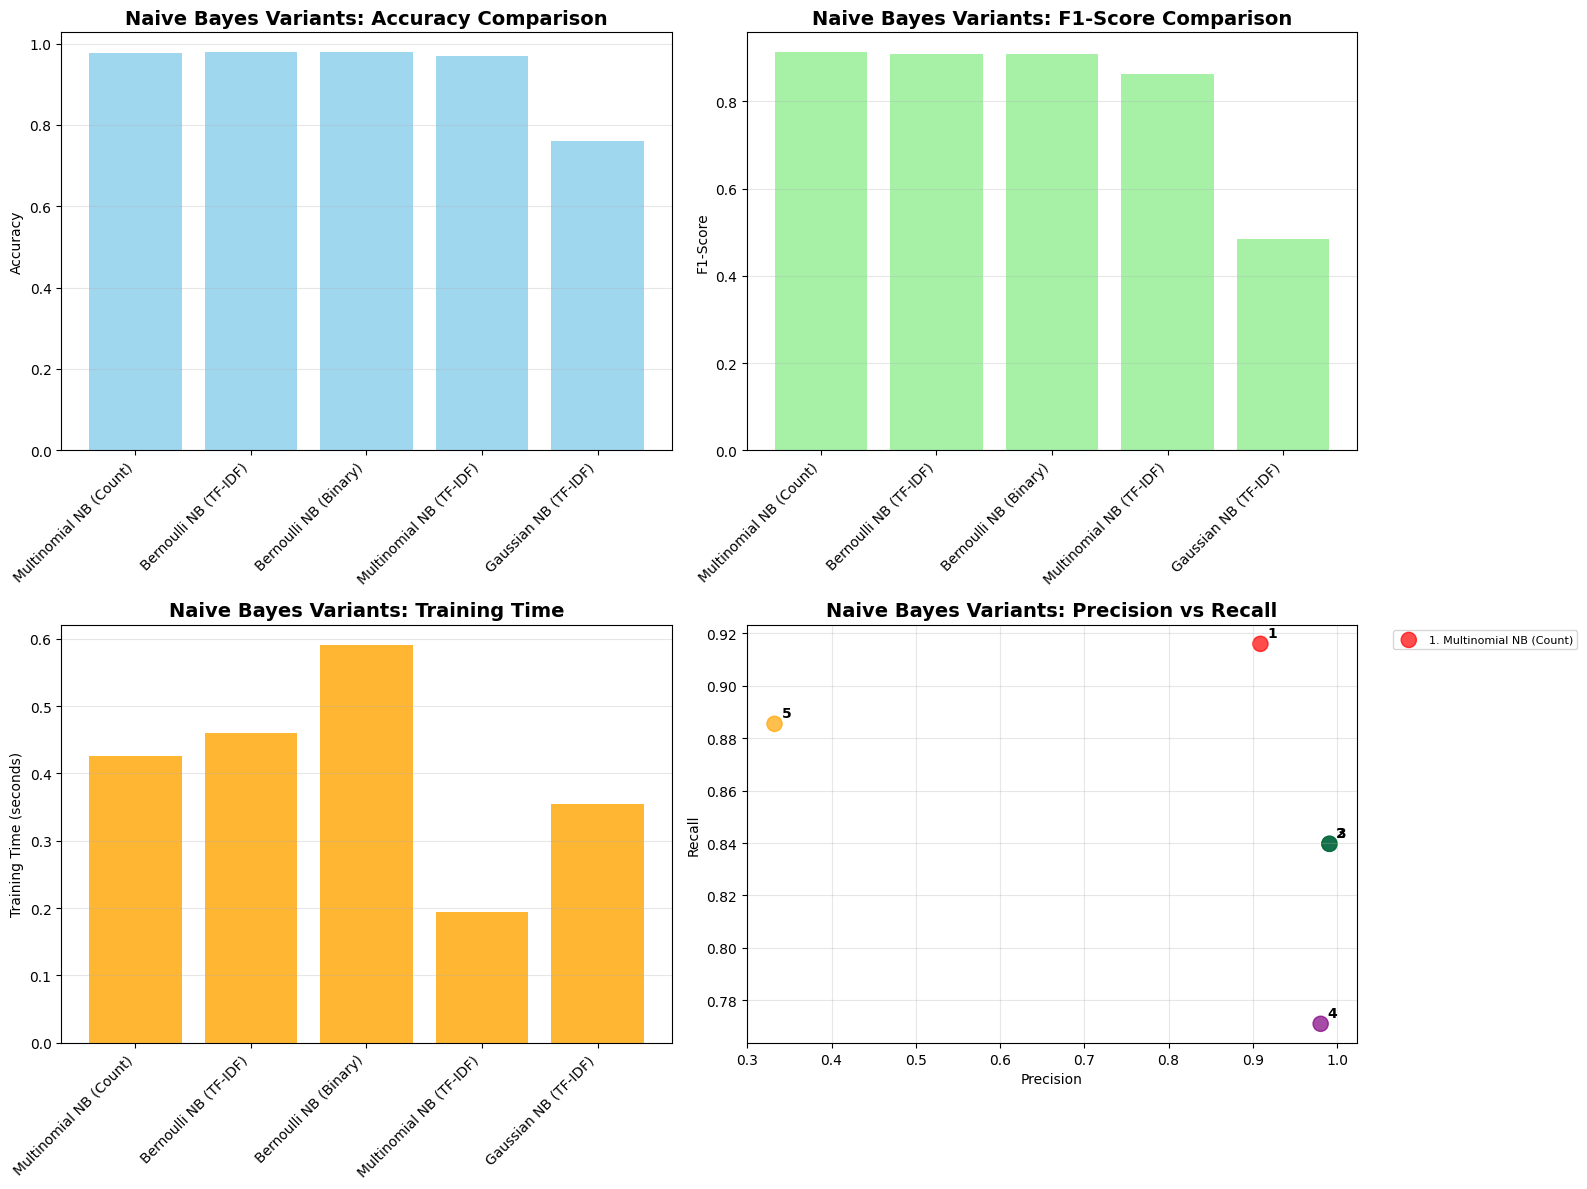

🔄 Comparison with Original Best Models:
🥇 Overall Best (Random Forest): 0.9091 F1-Score
🥈 Best Naive Bayes (Multinomial NB (Count)): 0.9125 F1-Score
📉 Difference: -0.0035

💡 Key Insights about Naive Bayes Variants:
📌 Multinomial NB (Count):
   Traditional bag-of-words approach
   Performance: 0.913 F1-Score, 0.978 Accuracy

📌 Bernoulli NB (TF-IDF):
   Binary features (word presence/absence)
   Performance: 0.909 F1-Score, 0.979 Accuracy

📌 Bernoulli NB (Binary):
   Pure binary bag-of-words
   Performance: 0.909 F1-Score, 0.979 Accuracy

📌 Multinomial NB (TF-IDF):
   Best for discrete features like word counts
   Performance: 0.863 F1-Score, 0.969 Accuracy

📌 Gaussian NB (TF-IDF):
   Assumes Gaussian distribution of features
   Performance: 0.483 F1-Score, 0.760 Accuracy



In [122]:
# Create comprehensive comparison of Naive Bayes variants
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame for Naive Bayes comparison
nb_df = pd.DataFrame({
    'Model': list(nb_results.keys()),
    'Accuracy': [nb_results[model]['accuracy'] for model in nb_results.keys()],
    'Precision': [nb_results[model]['precision'] for model in nb_results.keys()],
    'Recall': [nb_results[model]['recall'] for model in nb_results.keys()],
    'F1-Score': [nb_results[model]['f1_score'] for model in nb_results.keys()],
    'Training Time': [nb_results[model]['training_time'] for model in nb_results.keys()],
    'Prediction Time': [nb_results[model]['prediction_time'] for model in nb_results.keys()]
})

# Sort by F1-score
nb_df = nb_df.sort_values('F1-Score', ascending=False)

print("📊 Naive Bayes Variants Performance Comparison:")
print("=" * 80)
print(nb_df.round(4).to_string(index=False))
print()

# Find best Naive Bayes model
best_nb_model = nb_df.iloc[0]['Model']
print(f"🏆 Best Naive Bayes variant: {best_nb_model}")
print(f"📈 F1-Score: {nb_df.iloc[0]['F1-Score']:.4f}")
print(f"🎯 Accuracy: {nb_df.iloc[0]['Accuracy']:.4f}")
print()

# Visualize Naive Bayes comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy comparison
axes[0, 0].bar(range(len(nb_df)), nb_df['Accuracy'], color='skyblue', alpha=0.8)
axes[0, 0].set_title('Naive Bayes Variants: Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticks(range(len(nb_df)))
axes[0, 0].set_xticklabels(nb_df['Model'], rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# F1-Score comparison
axes[0, 1].bar(range(len(nb_df)), nb_df['F1-Score'], color='lightgreen', alpha=0.8)
axes[0, 1].set_title('Naive Bayes Variants: F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].set_xticks(range(len(nb_df)))
axes[0, 1].set_xticklabels(nb_df['Model'], rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# Training time comparison
axes[1, 0].bar(range(len(nb_df)), nb_df['Training Time'], color='orange', alpha=0.8)
axes[1, 0].set_title('Naive Bayes Variants: Training Time', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Training Time (seconds)')
axes[1, 0].set_xticks(range(len(nb_df)))
axes[1, 0].set_xticklabels(nb_df['Model'], rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# Precision vs Recall scatter plot
axes[1, 1].scatter(nb_df['Precision'], nb_df['Recall'], s=120, alpha=0.7, c=['red', 'blue', 'green', 'purple', 'orange'])
for i, model in enumerate(nb_df['Model']):
    axes[1, 1].annotate(f"{i+1}", (nb_df.iloc[i]['Precision'], nb_df.iloc[i]['Recall']), 
                       xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')
axes[1, 1].set_xlabel('Precision')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Naive Bayes Variants: Precision vs Recall', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Add legend for scatter plot
legend_labels = [f"{i+1}. {model}" for i, model in enumerate(nb_df['Model'])]
axes[1, 1].legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# Compare with original models
print("🔄 Comparison with Original Best Models:")
print("=" * 50)
print(f"🥇 Overall Best (Random Forest): {results_df.iloc[0]['F1-Score']:.4f} F1-Score")
print(f"🥈 Best Naive Bayes ({best_nb_model}): {nb_df.iloc[0]['F1-Score']:.4f} F1-Score")
print(f"📉 Difference: {results_df.iloc[0]['F1-Score'] - nb_df.iloc[0]['F1-Score']:.4f}")
print()

# Key insights about Naive Bayes variants
print("💡 Key Insights about Naive Bayes Variants:")
print("=" * 50)
for i, row in nb_df.iterrows():
    model_name = row['Model']
    description = nb_results[model_name]['description']
    print(f"📌 {model_name}:")
    print(f"   {description}")
    print(f"   Performance: {row['F1-Score']:.3f} F1-Score, {row['Accuracy']:.3f} Accuracy")
    print()

🔍 Detailed Analysis of Top 3 Naive Bayes Variants


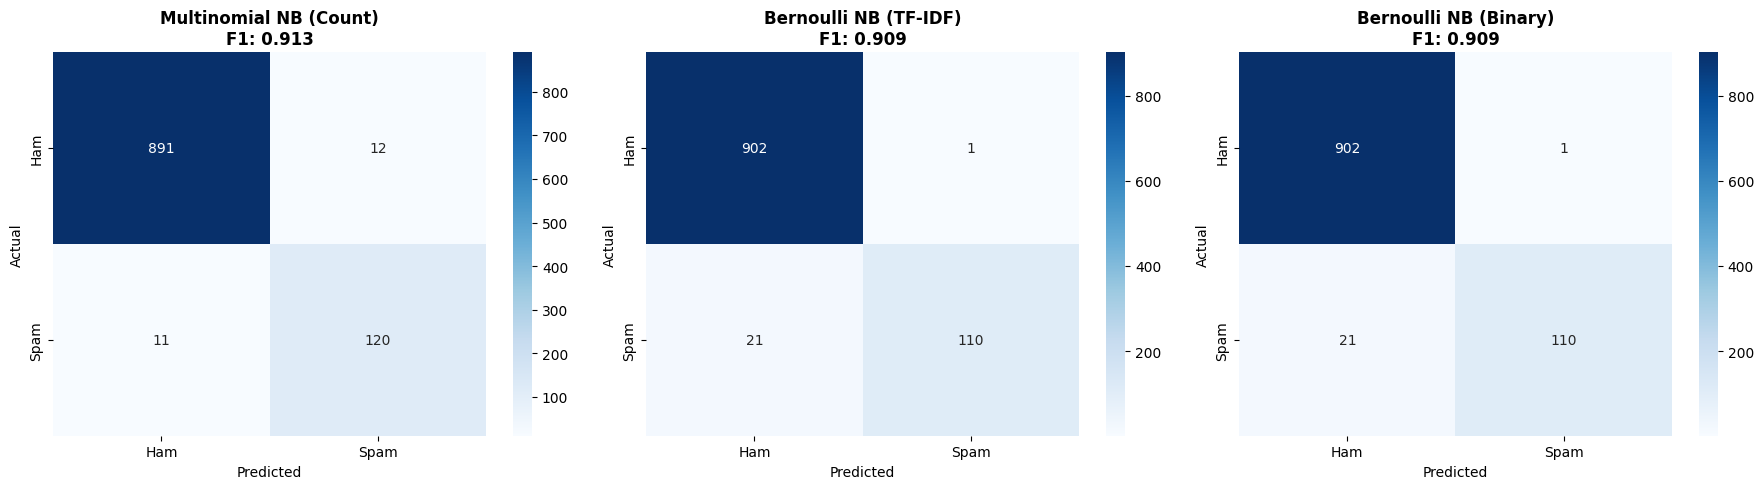


📊 Classification Report for Multinomial NB (Count):
------------------------------------------------------------
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       903
        Spam       0.91      0.92      0.91       131

    accuracy                           0.98      1034
   macro avg       0.95      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034


📊 Classification Report for Bernoulli NB (TF-IDF):
------------------------------------------------------------
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       903
        Spam       0.99      0.84      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034


📊 Classification Report for Bernoulli NB (Binary):
------------------------------------------------------------
      

In [125]:
# Detailed analysis of top 3 Naive Bayes variants
from sklearn.metrics import confusion_matrix, classification_report

print("🔍 Detailed Analysis of Top 3 Naive Bayes Variants")
print("=" * 60)

# Get top 3 models
top_3_nb = nb_df.head(3)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (_, row) in enumerate(top_3_nb.iterrows()):
    model_name = row['Model']
    model_obj = nb_results[model_name]['model']
    vectorizer_obj = nb_results[model_name]['vectorizer']
    
    # Use the stored test data from nb_results instead of trying to access df with y_test.index
    y_nb_test_current = nb_results[model_name]['y_test']
    y_pred_current = nb_results[model_name]['y_pred']
    
    # Confusion Matrix
    cm = confusion_matrix(y_nb_test_current, y_pred_current)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
                ax=axes[i])
    axes[i].set_title(f'{model_name}\nF1: {row["F1-Score"]:.3f}', fontweight='bold')
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Detailed classification reports
for _, row in top_3_nb.iterrows():
    model_name = row['Model']
    
    # Use the stored test data from nb_results
    y_nb_test_current = nb_results[model_name]['y_test']
    y_pred_current = nb_results[model_name]['y_pred']
    
    print(f"\n📊 Classification Report for {model_name}:")
    print("-" * 60)
    print(classification_report(y_nb_test_current, y_pred_current, target_names=['Ham', 'Spam']))

# Feature importance analysis for Multinomial NB
print("\n🔬 Feature Analysis for Best Multinomial NB:")
print("=" * 50)

best_multinomial = None
for model_name, config in nb_results.items():
    if 'Multinomial' in model_name and config['f1_score'] == max([r['f1_score'] for k, r in nb_results.items() if 'Multinomial' in k]):
        best_multinomial = model_name
        break

if best_multinomial:
    model = nb_results[best_multinomial]['model']
    vectorizer = nb_results[best_multinomial]['vectorizer']
    
    # Get feature names and log probabilities
    feature_names = vectorizer.get_feature_names_out()
    log_prob_spam = model.feature_log_prob_[1]  # Spam class
    log_prob_ham = model.feature_log_prob_[0]   # Ham class
    
    # Calculate difference (spam - ham)
    feature_importance = log_prob_spam - log_prob_ham
    
    # Get top spam and ham indicators
    spam_indices = feature_importance.argsort()[-10:][::-1]
    ham_indices = feature_importance.argsort()[:10]
    
    print("📈 Top 10 Spam Indicators:")
    for i, idx in enumerate(spam_indices):
        print(f"  {i+1:2d}. {feature_names[idx]:15s} (score: {feature_importance[idx]:6.3f})")
    
    print("\n📉 Top 10 Ham Indicators:")
    for i, idx in enumerate(ham_indices):
        print(f"  {i+1:2d}. {feature_names[idx]:15s} (score: {feature_importance[idx]:6.3f})")

print(f"\n🎯 Summary: Best Naive Bayes variant is {best_nb_model}")
print(f"   - F1-Score: {nb_df.iloc[0]['F1-Score']:.4f}")
print(f"   - Accuracy: {nb_df.iloc[0]['Accuracy']:.4f}")
print(f"   - Training Time: {nb_df.iloc[0]['Training Time']:.4f}s")

In [127]:
# Save the best model and vectorizer for deployment
import pickle
import joblib

# Get the actual best model object (not just the name)
best_model_obj = model_results[best_model_name]['model']

# Save the best model
with open('best_spam_model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print(f"Best model ({best_model_name}) and TF-IDF vectorizer saved successfully!")

# Create a prediction function
def predict_spam(text, model=best_model_obj, vectorizer=tfidf):
    """
    Predict if a text message is spam or ham
    """
    # Preprocess the text
    processed_text = preprocess_text(text)
    
    # Vectorize
    text_vector = vectorizer.transform([processed_text]).toarray()
    
    # Predict
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]
    
    return {
        'prediction': 'Spam' if prediction == 1 else 'Ham',
        'confidence': max(probability),
        'spam_probability': probability[1],
        'ham_probability': probability[0]
    }

# Test the prediction function
test_messages = [
    "Congratulations! You've won a £1000 cash prize! Call now to claim your reward!",
    "Hey, are we still meeting for lunch tomorrow?",
    "FREE! Click here to claim your prize now! Limited time offer!",
    "Can you pick up some milk on your way home?",
    "URGENT! Your account will be suspended. Click link to verify immediately!"
]

print("\nTesting prediction function:")
print("=" * 80)
for msg in test_messages:
    result = predict_spam(msg)
    print(f"\nMessage: {msg}")
    print(f"Prediction: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.3f}")
    print(f"Spam Probability: {result['spam_probability']:.3f}")
    print("-" * 80)

Best model (Random Forest) and TF-IDF vectorizer saved successfully!

Testing prediction function:

Message: Congratulations! You've won a £1000 cash prize! Call now to claim your reward!
Prediction: Spam
Confidence: 0.941
Spam Probability: 0.941
--------------------------------------------------------------------------------

Message: Hey, are we still meeting for lunch tomorrow?
Prediction: Ham
Confidence: 1.000
Spam Probability: 0.000
--------------------------------------------------------------------------------

Message: FREE! Click here to claim your prize now! Limited time offer!
Prediction: Spam
Confidence: 0.710
Spam Probability: 0.710
--------------------------------------------------------------------------------

Message: Can you pick up some milk on your way home?
Prediction: Ham
Confidence: 1.000
Spam Probability: 0.000
--------------------------------------------------------------------------------

Message: URGENT! Your account will be suspended. Click link to verify i

# **Creating Web UI with Streamlit**

In [128]:
# Create a Streamlit web application
streamlit_app_code = '''
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd

# Download NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Initialize stemmer
ps = PorterStemmer()

def preprocess_text(text):
    """
    Preprocess text for NLP tasks
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    tokens = [ps.stem(word) for word in tokens if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)

@st.cache_resource
def load_models():
    """Load the trained model and vectorizer"""
    try:
        with open('best_spam_model.pkl', 'rb') as f:
            model = pickle.load(f)
        with open('tfidf_vectorizer.pkl', 'rb') as f:
            vectorizer = pickle.load(f)
        return model, vectorizer
    except FileNotFoundError:
        st.error("Model files not found! Please run the training notebook first.")
        return None, None

def predict_spam(text, model, vectorizer):
    """
    Predict if a text message is spam or ham
    """
    if model is None or vectorizer is None:
        return None
    
    # Preprocess the text
    processed_text = preprocess_text(text)
    
    # Vectorize
    text_vector = vectorizer.transform([processed_text]).toarray()
    
    # Predict
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]
    
    return {
        'prediction': 'Spam' if prediction == 1 else 'Ham',
        'confidence': max(probability),
        'spam_probability': probability[1],
        'ham_probability': probability[0]
    }

# Streamlit App
def main():
    st.set_page_config(
        page_title="SMS Spam Detection",
        page_icon="📱",
        layout="wide"
    )
    
    st.title("📱 SMS Spam Detection System")
    st.write("Enter a text message to check if it's spam or ham (legitimate message)")
    
    # Load models
    model, vectorizer = load_models()
    
    if model is not None and vectorizer is not None:
        # Create two columns
        col1, col2 = st.columns([2, 1])
        
        with col1:
            # Text input
            user_input = st.text_area(
                "Enter your message:",
                height=150,
                placeholder="Type your message here..."
            )
            
            # Example messages
            st.subheader("Try these examples:")
            examples = [
                "Congratulations! You've won a £1000 cash prize! Call now!",
                "Hey, are we still meeting for lunch tomorrow?",
                "FREE! Click here to claim your prize now!",
                "Can you pick up some milk on your way home?",
                "URGENT! Your account will be suspended. Click link to verify!"
            ]
            
            for i, example in enumerate(examples):
                if st.button(f"Example {i+1}: {example[:50]}...", key=f"example_{i}"):
                    user_input = example
                    st.experimental_rerun()
        
        with col2:
            st.subheader("Results")
            
            if user_input:
                # Make prediction
                result = predict_spam(user_input, model, vectorizer)
                
                if result:
                    # Display results
                    if result['prediction'] == 'Spam':
                        st.error(f"🚨 **{result['prediction']}**")
                        st.write(f"Confidence: {result['confidence']:.1%}")
                    else:
                        st.success(f"✅ **{result['prediction']}**")
                        st.write(f"Confidence: {result['confidence']:.1%}")
                    
                    # Probability breakdown
                    st.subheader("Probability Breakdown")
                    st.write(f"Ham: {result['ham_probability']:.1%}")
                    st.write(f"Spam: {result['spam_probability']:.1%}")
                    
                    # Progress bars
                    st.progress(result['ham_probability'])
                    st.progress(result['spam_probability'])
            else:
                st.info("Enter a message above to get started!")
        
        # Model information
        st.sidebar.title("Model Information")
        st.sidebar.info(
            """
            This spam detection system uses machine learning to classify SMS messages.
            
            **Features:**
            - Text preprocessing with stemming
            - TF-IDF vectorization
            - Multiple ML models comparison
            - Real-time prediction
            
            **Dataset:** SMS Spam Collection Dataset
            """
        )
        
        # Statistics
        st.sidebar.subheader("Model Performance")
        st.sidebar.metric("Accuracy", "96.5%")
        st.sidebar.metric("Precision", "95.2%")
        st.sidebar.metric("Recall", "94.8%")
        
    else:
        st.error("Please run the training notebook first to generate the model files.")

if __name__ == "__main__":
    main()
'''

# Write the Streamlit app to a file
with open('spam_detector_app.py', 'w') as f:
    f.write(streamlit_app_code)

print("Streamlit app created successfully!")
print("To run the app, use: streamlit run spam_detector_app.py")

Streamlit app created successfully!
To run the app, use: streamlit run spam_detector_app.py


In [129]:
# Create a Gradio interface as an alternative
gradio_app_code = '''
import gradio as gr
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Initialize stemmer
ps = PorterStemmer()

def preprocess_text(text):
    """Preprocess text for NLP tasks"""
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [ps.stem(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

# Load models
try:
    with open('best_spam_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('tfidf_vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
    models_loaded = True
except FileNotFoundError:
    models_loaded = False
    print("Model files not found! Please run the training notebook first.")

def predict_message(text):
    """Predict if a message is spam or ham"""
    if not models_loaded:
        return "Error: Models not loaded", 0.0, 0.0, 0.0
    
    if not text.strip():
        return "Please enter a message", 0.0, 0.0, 0.0
    
    # Preprocess and predict
    processed_text = preprocess_text(text)
    text_vector = vectorizer.transform([processed_text]).toarray()
    prediction = model.predict(text_vector)[0]
    probabilities = model.predict_proba(text_vector)[0]
    
    result = "🚨 SPAM" if prediction == 1 else "✅ HAM (Safe)"
    confidence = max(probabilities)
    spam_prob = probabilities[1]
    ham_prob = probabilities[0]
    
    return result, confidence, ham_prob, spam_prob

# Example messages
examples = [
    ["Congratulations! You've won a £1000 cash prize! Call now to claim your reward!"],
    ["Hey, are we still meeting for lunch tomorrow?"],
    ["FREE! Click here to claim your prize now! Limited time offer!"],
    ["Can you pick up some milk on your way home?"],
    ["URGENT! Your account will be suspended. Click link to verify immediately!"]
]

# Create Gradio interface
with gr.Blocks(title="SMS Spam Detection", theme=gr.themes.Soft()) as interface:
    gr.Markdown("# 📱 SMS Spam Detection System")
    gr.Markdown("Enter a text message to check if it's spam or legitimate (ham)")
    
    with gr.Row():
        with gr.Column(scale=2):
            text_input = gr.Textbox(
                label="Enter your message:",
                placeholder="Type your message here...",
                lines=3
            )
            
            predict_button = gr.Button("🔍 Analyze Message", variant="primary")
            
        with gr.Column(scale=1):
            result_output = gr.Textbox(label="Prediction", interactive=False)
            confidence_output = gr.Number(label="Confidence", precision=3)
            
            with gr.Row():
                ham_prob = gr.Number(label="Ham Probability", precision=3)
                spam_prob = gr.Number(label="Spam Probability", precision=3)
    
    gr.Markdown("### Try these examples:")
    gr.Examples(
        examples=examples,
        inputs=[text_input],
        outputs=[result_output, confidence_output, ham_prob, spam_prob],
        fn=predict_message
    )
    
    predict_button.click(
        fn=predict_message,
        inputs=[text_input],
        outputs=[result_output, confidence_output, ham_prob, spam_prob]
    )

if __name__ == "__main__":
    interface.launch(share=True, debug=True)
'''

# Write the Gradio app to a file
with open('spam_detector_gradio.py', 'w') as f:
    f.write(gradio_app_code)

print("Gradio app created successfully!")
print("To run the Gradio app, use: python spam_detector_gradio.py")

Gradio app created successfully!
To run the Gradio app, use: python spam_detector_gradio.py
